In [1]:
import pandas as pd

In [2]:
fakenews1=pd.read_csv('/Users/nischal/Desktop/Git Hub Projects/Fake News Classifier/train.csv')

In [3]:
x=fakenews1.drop('label',axis=1)

In [4]:
y=fakenews1['label']

In [5]:
x

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal..."


In [6]:
from nltk.corpus import stopwords
import re
from nltk.stem import WordNetLemmatizer
wl=WordNetLemmatizer()

In [22]:
s=x['title'][4]

''.join([wl.lemmatize(i) for i in s if not i in stopwords.words('english')])

'Irnn wn jle fr fcnl unpublhe r bu wn ne  eh fr uler'

In [23]:
corpus=[]
for i in range(len(x)):
    review=re.sub('[^a-zA-Z]' ,' ', str(x['title'][i]))
    review=review.lower()
    review=review.strip()
    review=''.join([wl.lemmatize(i) for i in review])
    corpus.append(review)
    
                  

In [24]:
corpus[3]

'civilians killed in single us airstrike have been identified'

In [25]:
for i in corpus:
    print(i)


house dem aide  we didn t even see comey s letter until jason chaffetz tweeted it
flynn  hillary clinton  big woman on campus   breitbart
why the truth might get you fired
civilians killed in single us airstrike have been identified
iranian woman jailed for fictional unpublished story about woman stoned to death for adultery
jackie mason  hollywood would love trump if he bombed north korea over lack of trans bathrooms  exclusive video    breitbart
life  life of luxury  elton john s   favorite shark pictures to stare at during long  transcontinental flights
beno t hamon wins french socialist party s presidential nomination   the new york times
excerpts from a draft script for donald trump s q ampa with a black church s pastor   the new york times
a back channel plan for ukraine and russia  courtesy of trump associates   the new york times
obama s organizing for action partners with soros linked  indivisible  to disrupt trump s agenda
bbc comedy sketch  real housewives of isis  causes ou

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [40]:
x=cv.fit_transform(corpus).toarray()


In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [48]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [88]:
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix,roc_curve,auc
model=MultinomialNB()

In [68]:
model1=model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [60]:
score=accuracy_score(y_pred,y_test)
print(f'The score is {score}')

The score is 0.9144230769230769


In [63]:
cm=confusion_matrix(y_pred,y_test)
cm

array([[2434,  282],
       [ 163, 2321]])

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline

<Figure size 1080x432 with 0 Axes>

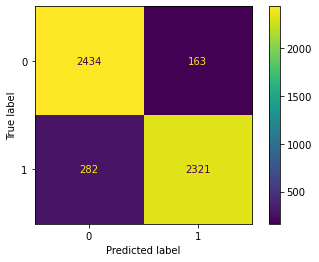

In [75]:
plt.figure(figsize=(15,6))
plot_confusion_matrix(model1, x_test,y_test)
plt.show()

In [94]:
y_test1=sorted(y_test)
y_pred1=sorted(y_pred)

In [95]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
fpr
roc_auc = auc(y_test1, y_pred1)

In [108]:
tpr[1]

0.8916634652324241